## Part 1
Stationarity is a critical concept in time series analysis, where the statistical properties (mean, variance, autocorrelation) do not change over time.

Common Stationarity Testing Methods:

    Augmented Dickey-Fuller (ADF) Test:
        Hypothesis:
            H0​: The time series has a unit root (non-stationary).
            H1​: The time series is stationary.
        The ADF test augments the Dickey-Fuller test by including lagged difference terms to handle autocorrelation.
        Key metrics: Test statistic, p-value, and critical values.

    Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:
        Hypothesis:
            H0​: The time series is stationary.
            H1​: The time series is non-stationary.
        This test decomposes the series into a deterministic trend, a random walk, and a stationary error.


- The **ADF test** is widely used because of its simplicity and effectiveness in detecting unit roots.
- The **KPSS test** complements the ADF test by testing for stationarity rather than non-stationarity.

there are many other tests that any one of them is good in some senario. but overall, we use a combination of these techniques in real world complex senarios.

[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

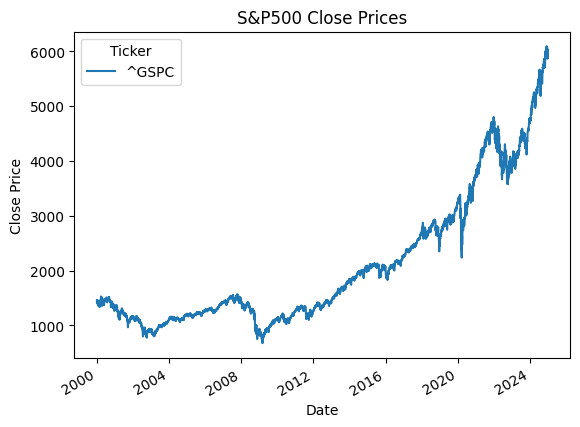

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Download S&P500 data
data = yf.download('^GSPC', start='2000-01-01', end='2025-01-01')
close_prices = data['Close']

# Plot the Close prices
plt.figure(figsize=(12, 6))
close_prices.plot(title='S&P500 Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


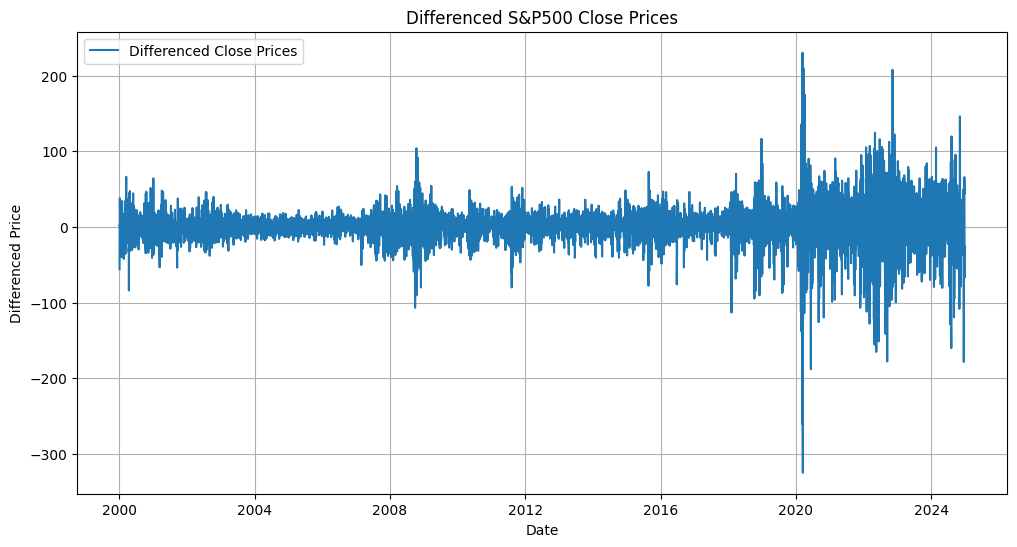

In [2]:
diff_close = close_prices.diff().dropna()

# Visualize transformed data
plt.figure(figsize=(12, 6))
plt.plot(diff_close, label='Differenced Close Prices')
plt.title('Differenced S&P500 Close Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

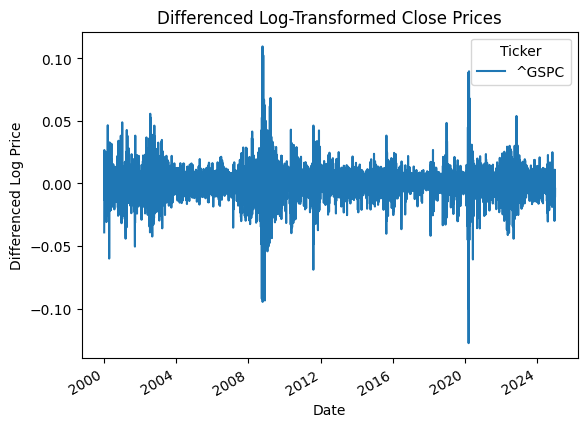

In [4]:
# Log transformation
log_prices = np.log(close_prices)

# Differencing
log_diff_prices = log_prices.diff().dropna()

# Plot transformed data
plt.figure(figsize=(12, 6))
log_diff_prices.plot(title='Differenced Log-Transformed Close Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Log Price')
plt.show()


In [6]:
from statsmodels.tsa.stattools import adfuller

# ADF test on differenced data
adf_result = adfuller(log_diff_prices)
p_value = adf_result[1]

# Output results
print("ADF Statistic:", adf_result[0])
print("p-value:", p_value)
print("Critical Values:", adf_result[4])
if p_value< 0.05:
    print('log diff is stationary')
else:
    print('log diff is not stationary')




ADF Statistic: -19.098784356327464
p-value: 0.0
Critical Values: {'1%': -3.4313933778649943, '5%': -2.862001080749219, '10%': -2.567015430304048}
log diff is stationary


In [7]:
# ADF test on differenced data
adf_result = adfuller(diff_close)
p_value = adf_result[1]

# Output results
print("ADF Statistic:", adf_result[0])
print("p-value:", p_value)
print("Critical Values:", adf_result[4])
if p_value< 0.05:
    print('diff is stationary')
else:
    print('diff is not stationary')

ADF Statistic: -15.7209577771844
p-value: 1.3241317911263523e-28
Critical Values: {'1%': -3.431395379411139, '5%': -2.8620019651000943, '10%': -2.567015901065109}
log diff is stationary


log diff is really good if we want stationary <br>
if we use normal diff again it is ok

The limitations of the approach include:

    Assumption of Linear Relationships: Stationarity transformations like differencing assume linear trends, which may oversimplify complex financial data patterns.

    Loss of Interpretability: Differencing and log transformations can obscure the original scale of data, complicating direct interpretation.

    Over-reliance on Statistical Tests: Tests like ADF and KPSS are sensitive to sample size, lag selection, and may yield conflicting results.

    Ignoring External Factors: Market dynamics influenced by external variables (e.g., macroeconomic events) are not considered, potentially leaving residual non-stationarity.

    Stationarity ≠ Predictability: Achieving stationarity does not guarantee improved forecasting performance, as financial markets are inherently noisy and complex.

## Part 2

The Random Walk Hypothesis (RWH) posits that stock prices evolve according to a stochastic process, where price changes are independent and identically distributed. This aligns with the Efficient Market Hypothesis (EMH), which suggests that prices fully reflect all available information, making them unpredictable.
Key Points:

    Implications for Predictability:
        Under RWH, future price movements are random and uncorrelated with past movements, implying that technical analysis and historical data cannot predict future prices.
        Fundamental analysis is also challenged if new information is quickly incorporated into prices.

    Empirical Evidence:
        Early studies (e.g., Kendall, 1953) observed that stock prices resemble a random walk.
        Fama (1970) expanded on RWH in the context of EMH, categorizing markets into weak, semi-strong, and strong forms.
        Critics like Lo and MacKinlay (1988) found evidence of mean reversion and short-term momentum, questioning the strict validity of RWH.

    Challenges to RWH:
        Behavioral finance highlights irrational behaviors, herding, and overreactions, leading to predictable patterns.
        Anomalies like momentum and seasonality (e.g., January effect) also contradict RWH.


In [8]:
# Estimate drift (mean) and volatility (standard deviation)
mu = log_diff_prices.mean()
sigma = log_diff_prices.std()

print(f"Estimated Drift (mu): {mu}")
print(f"Estimated Volatility (sigma): {sigma}")


Estimated Drift (mu): Ticker
^GSPC    0.000222
dtype: float64
Estimated Volatility (sigma): Ticker
^GSPC    0.012234
dtype: float64


<ipython-input-9-e8f48e533e7a>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inp =  sigma[0] * random_shocks
<ipython-input-9-e8f48e533e7a>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inp += mu[0]
<ipython-input-9-e8f48e533e7a>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  simulated_paths[:, i] = P0[0] * final_diff


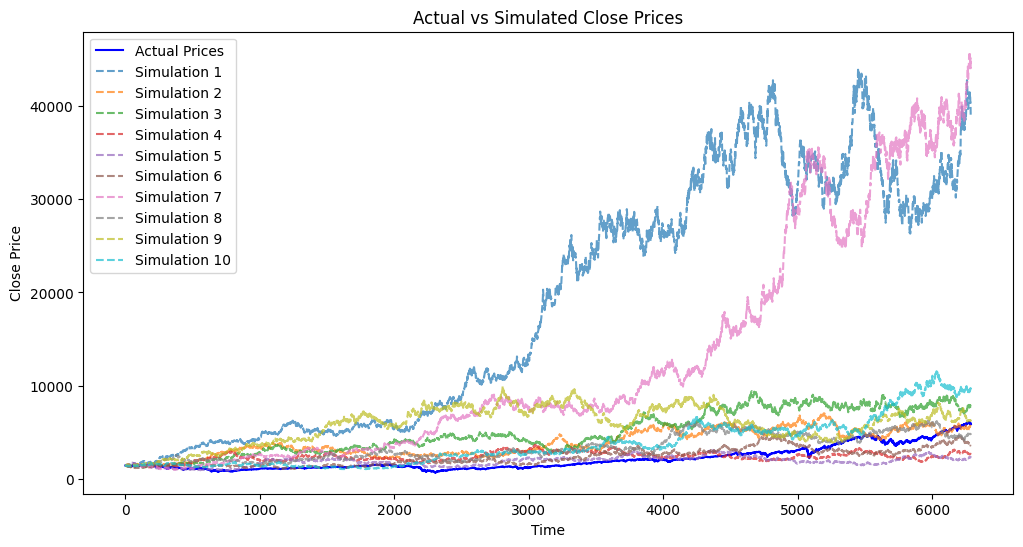

In [9]:
# Simulate random walk paths
num_simulations = 10
num_steps = len(log_diff_prices)
simulated_paths = np.zeros((num_steps, num_simulations))

# Initial price
P0 = data['Close'].iloc[0]

for i in range(num_simulations):
    random_shocks = np.random.normal(0, 1, num_steps)
    # print(sigma[0])
    # print(random_shocks)
    inp =  sigma[0] * random_shocks
    inp += mu[0]
    differences = np.cumsum(inp)

    final_diff = np.exp(differences)
    # print(final_diff)
    # print(P0)
    simulated_paths[:, i] = P0[0] * final_diff

# Plot actual vs. simulated paths
plt.figure(figsize=(12, 6))
plt.plot(data['Close'].to_numpy(), label='Actual Prices', color='blue')
for i in range(num_simulations):
    plt.plot(simulated_paths[:, i], linestyle='--', alpha=0.7)
plt.title('Actual vs Simulated Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(['Actual Prices'] + [f'Simulation {i+1}' for i in range(num_simulations)])
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate residuals for log-likelihood
residuals = log_diff_prices - mu
n = len(residuals)

# Log-likelihood
log_likelihood = -n/2 * np.log(2 * np.pi) - n/2 * np.log(sigma**2) - np.sum(residuals**2) / (2 * sigma**2)
log_likelihood = log_likelihood.iloc[0]
print(f"Log-Likelihood: {log_likelihood}")

# MAE and RMSE
for i in range(num_simulations):
    simulated_prices = simulated_paths[:, i]

    mae = mean_absolute_error(data['Close'][1:], simulated_prices)
    rmse = np.sqrt(mean_squared_error(data['Close'][1:], simulated_prices))

    print('sim',i)
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")


Log-Likelihood: 18767.676405779748
sim 0
MAE: 16668.931550943187
RMSE: 20713.1354584763
sim 1
MAE: 1779.3351534047495
RMSE: 2017.070807687453
sim 2
MAE: 2882.9566899976753
RMSE: 3220.5070896737207
sim 3
MAE: 1084.5282593228692
RMSE: 1259.2681400841718
sim 4
MAE: 802.8471233842386
RMSE: 1160.5529828939682
sim 5
MAE: 658.4796800601805
RMSE: 805.3379291866092
sim 6
MAE: 10589.298823996232
RMSE: 15317.372734054592
sim 7
MAE: 1324.7641706055074
RMSE: 1524.5637390168133
sim 8
MAE: 3703.004118323486
RMSE: 4304.180622593333
sim 9
MAE: 1641.8936648221586
RMSE: 2185.929187037045


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Assumptions of the Random Walk Model:

    Independence: Price changes (ϵtϵt​) are independent of each other.
    Identically Distributed: Price changes are drawn from the same distribution (often normal).
    No Memory: Past prices or returns have no influence on future movements.
    No Drift (Optional): The process may assume zero or constant drift (μμ).

Why It Might Be Too Simplistic for Financial Data:

    Market Frictions: Transaction costs and liquidity constraints create dependencies not captured by the model.
    Autocorrelation: Empirical data often exhibit momentum or mean reversion, violating independence.
    Non-Normality: Financial returns exhibit fat tails and skewness, inconsistent with normality assumptions.
    External Influences: Economic events and investor behavior introduce patterns and trends.
    Heteroskedasticity: Volatility is not constant over time, as observed in phenomena like volatility clustering.

Thus, while foundational, the Random Walk model oversimplifies real-world complexities in financial markets.

## Part 3
Geometric Brownian Motion (GBM) is a widely used stochastic process in financial modeling, particularly for stock prices. It is the foundation of the Black-Scholes option pricing model.
Key Features:

    Equation:
    dPt=μPtdt+σPtdWt
    dPt​=μPt​dt+σPt​dWt​
        Pt​: Stock price at time t.
        μ: Drift rate (expected return).
        σ: Volatility.
        Wt​: Wiener process (standard Brownian motion).

    Key Assumptions:
        Log returns (ln⁡(Pt+1/Pt)ln(Pt+1​/Pt​)) are normally distributed.
        Prices follow a continuous, smooth path.
        Returns are independent and identically distributed.

    Applications:
        Option pricing (e.g., Black-Scholes model).
        Risk management and portfolio optimization.
        Forecasting under the Efficient Market Hypothesis.

the explicit solution for \( P_t \) is:

$$ P_t = P_0 \exp \left( \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t \right) $$

which means that log prices follow a Brownian motion with drift:

$$ \log P_t = \log P_0 + \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t. $$

log prices follow a normal distribution, while actual prices follow a lognormal distribution.


Advantages:

    1. Captures Lognormal Price Distribution
    Since stock prices cannot be negative, GBM naturally models positive-valued price paths.

    2. Includes Drift & Volatility
    Unlike a pure random walk, GBM explicitly models a trend and volatility.

    3. Efficient for Monte Carlo Simulations
    GBM is commonly used for risk assessment in portfolio management.

Limitations:

    Simplistic Volatility: GBM assumes constant volatility, ignoring phenomena like volatility clustering.
    Non-Normality: Financial returns often exhibit fat tails and skewness.
    External Factors: GBM does not account for macroeconomic factors or abrupt price changes (jumps).


In [11]:

data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))

log_returns = data['Log Returns'].dropna()

# Estimate GBM parameters
mu_gbm = log_returns.mean() + (log_returns.var() / 2)  # Adjusted drift
sigma_gbm = log_returns.std()  # Volatility

print(f"Estimated Drift (μ): ",mu_gbm)
print(f"Estimated Volatility (σ):", sigma_gbm)


Estimated Drift (μ):  0.0002969525887142753
Estimated Volatility (σ): 0.012233950320936804


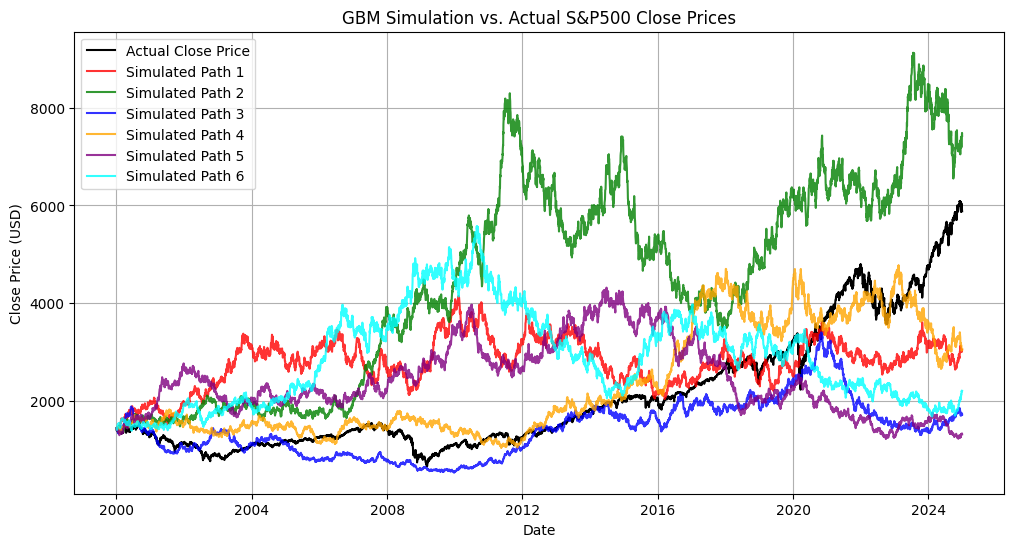

Log-Likelihood: -14466319531.361181
MAE: 1038.1551936832145
RMSE: 1196.7689759721718


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Setup
N = len(data)
num_days = N - 1
first_price = data['Close'].iloc[0]
num_simulations = 6
simulated_paths = []
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# Generate simulated paths
for sim in range(num_simulations):
    prices = [first_price]
    shocks = np.random.normal(0, 1, num_days)

    for i in range(num_days):
        next_price = prices[-1] * np.exp((mu_gbm - 0.5 * sigma_gbm**2) + sigma_gbm * shocks[i])
        prices.append(next_price)

    simulated_paths.append(prices)

# Actual prices
actual_prices = data['Close'].values

# Compute log-likelihood
log_likelihood = -0.5 * np.sum((np.log(2 * np.pi * sigma_gbm**2) + ((actual_prices[1:] - actual_prices[:-1])**2) / sigma_gbm**2))

# Compute MAE and RMSE using the average of simulated paths
simulated_avg = np.mean(simulated_paths, axis=0)
mae = mean_absolute_error(actual_prices, simulated_avg)
rmse = np.sqrt(mean_squared_error(actual_prices, simulated_avg))

# Plot actual data
plt.figure(figsize=(12,6))
plt.plot(data.index, actual_prices, label='Actual Close Price', color='black')

# Plot simulated paths
for idx, path in enumerate(simulated_paths):
    plt.plot(data.index, path, color=colors[idx % len(colors)], alpha=0.8, label=f"Simulated Path {idx+1}")

# Final plot adjustments
plt.title("GBM Simulation vs. Actual S&P500 Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print(f"Log-Likelihood: {log_likelihood}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


we see that some of the paths are reallly different than the real data and that causes a big log likelihood loss
but in average we see that the rmse and mae are not that bad and can be considered somehow accurate

The Geometric Brownian Motion (GBM) model handles price trends and volatility as follows:

    Price Trends: The model incorporates a drift term (mu_gbm) representing the expected return over time. This ensures that prices follow an overall trend, which can be upward or downward.
    Volatility: The model introduces randomness through a Wiener process (sigma_gbm * shocks[i]), allowing prices to fluctuate around the trend. The standard deviation (sigma_gbm) determines the level of these fluctuations.

Limitations of GBM in Capturing Real-World Financial Data

    Constant Volatility Assumption: Real markets exhibit stochastic volatility (volatility clustering), while GBM assumes constant volatility over time.
    No Mean Reversion: GBM does not account for mean-reverting behavior observed in assets like interest rates and commodity prices.
    No Jumps or Fat Tails: Real asset prices sometimes experience sudden shocks (e.g., crashes, news events), which GBM does not capture.
    Independence of Returns: GBM assumes that daily returns are independent, but in reality, financial markets often show autocorrelations.
    No Market Microstructure Effects: GBM does not incorporate trading constraints, liquidity issues, or bid-ask spreads.

## part 4

**iterature Review**

Gaussian Process Regression (GPR) has gained recognition as a powerful non-parametric Bayesian method for modeling and forecasting financial time series data. Its ability to capture intricate nonlinear relationships without requiring predefined functional forms makes it particularly well-suited for the volatile and noisy nature of financial markets. Unlike traditional regression models that impose specific assumptions on data distributions, GPR interprets data as samples from a multivariate Gaussian distribution, enabling it to generate probabilistic predictions with uncertainty estimates. This probabilistic nature is crucial in financial applications, as it helps quantify confidence in predictions, supporting risk management and informed decision-making (Rasmussen & Williams, 2006).

In financial modeling, GPR has been widely applied to tasks such as stock price prediction, volatility forecasting, portfolio optimization, and risk assessment. Bovik and Zhang (2011) demonstrated the superiority of GPR over linear models in predicting stock returns, effectively capturing temporal dependencies and nonlinear trends in financial data. Similarly, Polson et al. (2014) leveraged GPR for volatility forecasting, showcasing its ability to model time-varying volatility with greater accuracy than traditional econometric models like GARCH. The flexibility of GPR in integrating diverse data sources and modeling intricate variable interactions makes it a valuable tool for financial analysts.

A key factor influencing GPR’s effectiveness is the selection of kernel functions, which determine the covariance structure of the data and encode prior assumptions about the underlying function. Commonly used kernels in financial applications include:

    Radial Basis Function (RBF) Kernel: Also known as the Gaussian kernel, it is widely used for modeling smooth and continuous functions. It effectively captures gradual trends, making it ideal for datasets where the underlying relationships are expected to be smooth and nonlinear (Rasmussen & Williams, 2006).

    Matern Kernel: Offering greater flexibility than the RBF kernel, the Matern kernel includes a smoothness parameter (νν), allowing it to model functions with varying degrees of differentiability. This makes it well-suited for financial data that exhibit irregular or less smooth behavior (Stein, 1999).

    Periodic Kernel: Designed for capturing cyclical patterns and seasonality, such as monthly or quarterly economic cycles. The periodic kernel is particularly useful for modeling recurring fluctuations in financial markets (Snelson & Ghahramani, 2006).

    Linear Kernel: Primarily used for modeling linear relationships, often in combination with other kernels to capture both linear and nonlinear dependencies. It is useful when an underlying linear trend is present in financial time series (Rasmussen & Williams, 2006).

    White Noise Kernel: Introduces noise into the model by adding a diagonal component to the covariance matrix, accounting for randomness in financial data and preventing overfitting to noise (Rasmussen & Williams, 2006).

By combining multiple kernels, GPR models can accommodate a diverse range of patterns in financial data. For example, a hybrid model incorporating both RBF and periodic kernels can simultaneously capture smooth trends and cyclical fluctuations, improving predictive accuracy in financial markets (Zhang et al., 2013).

Despite its advantages, GPR faces challenges in financial applications, particularly regarding computational scalability. The training complexity of GPR grows cubically with the dataset size, making it computationally expensive for large financial datasets. Recent advancements, such as sparse Gaussian processes and approximate inference techniques, have been developed to address these limitations, enabling GPR to scale effectively while maintaining accuracy (Quiñonero-Candela & Rasmussen, 2005).

In conclusion, Gaussian Process Regression provides a robust and adaptable framework for financial modeling, effectively capturing nonlinear relationships and generating probabilistic predictions. The choice of kernel functions significantly impacts model performance, allowing practitioners to tailor covariance structures to specific financial data characteristics. With ongoing computational advancements, GPR’s applicability in finance is expected to expand, offering deeper insights and more precise forecasts in the dynamic financial landscape.

In [30]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define date range for data retrieval
start_date, end_date = "2023-01-01", "2025-01-01"
sp500 = yf.download("^GSPC", start=start_date, end=end_date)

# Data preprocessing
sp500.dropna(inplace=True)
sp500["Price_Range"] = sp500["High"] - sp500["Low"]  # Daily range
sp500["Log_Volume"] = np.log1p(sp500["Volume"])  # Log volume
sp500["Daily_Return"] = sp500["Close"].pct_change()  # Returns
sp500["Volatility"] = sp500["Daily_Return"].rolling(5).std()  # Rolling volatility
sp500.dropna(inplace=True)

# Feature selection and target variable
target_col = "Close"
features = ["Price_Range", "Log_Volume", "Daily_Return", "Volatility"]
X, y = sp500[features].values, sp500[target_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Define Gaussian Process kernels
kernels = {
    "RBF Kernel - Price Range": C(1.0) * RBF(length_scale=np.std(sp500["Price_Range"])),
    "Matern Kernel - Log Volume": C(1.0) * Matern(length_scale=np.std(sp500["Log_Volume"]), nu=2.5),
    "RationalQuadratic Kernel - Return": C(1.0) * RationalQuadratic(length_scale=np.std(sp500["Daily_Return"]), alpha=0.5),
    "Periodic Kernel - Volatility": C(1.0) * ExpSineSquared(length_scale=np.std(sp500["Volatility"]), periodicity=90.0),
}

# Train Gaussian Process models
models = {}
for kernel_name, kernel in kernels.items():
    try:
        gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=1e-5, normalize_y=True)
        gpr.fit(X_train, y_train)
        models[kernel_name] = gpr
        print(f"{kernel_name} - Model trained successfully with kernel parameters:")
        print(gpr.kernel_)
    except Exception as e:
        print(f"{kernel_name} - Training failed: {e}")

[*********************100%***********************]  1 of 1 completed


RBF Kernel - Price Range - Model trained successfully with kernel parameters:
1**2 * RBF(length_scale=1e-05)
Matern Kernel - Log Volume - Model trained successfully with kernel parameters:
1**2 * Matern(length_scale=1e-05, nu=2.5)
RationalQuadratic Kernel - Return - Model trained successfully with kernel parameters:
1**2 * RationalQuadratic(alpha=0.51, length_scale=0.0034)
Periodic Kernel - Volatility - Model trained successfully with kernel parameters:
2.43**2 * ExpSineSquared(length_scale=1.28e-05, periodicity=1e-05)


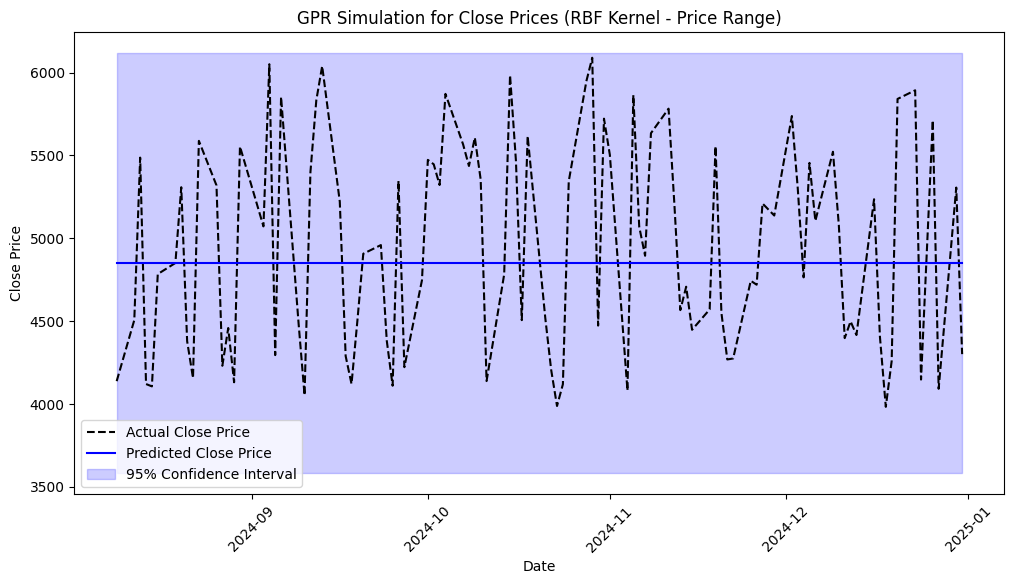

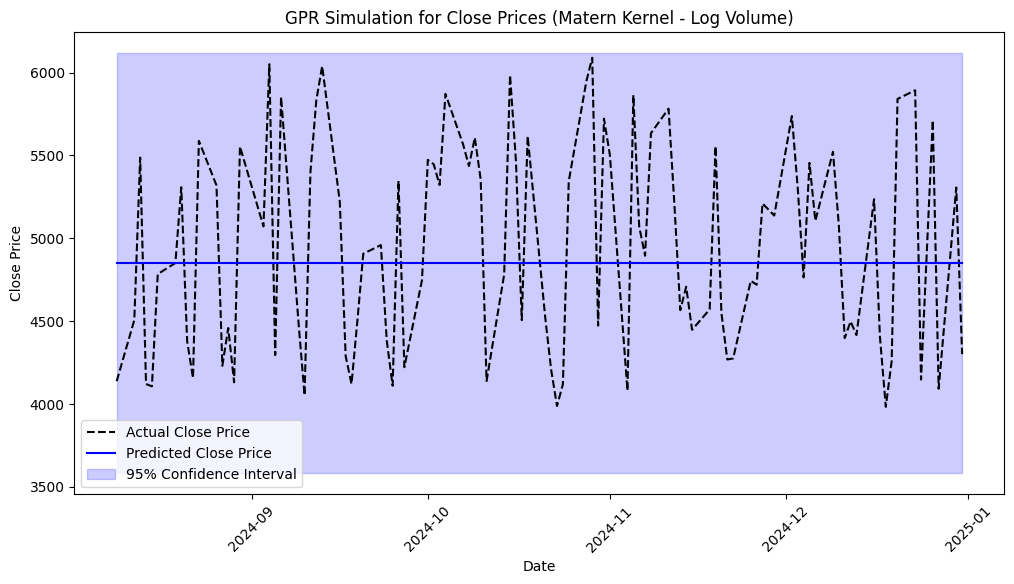

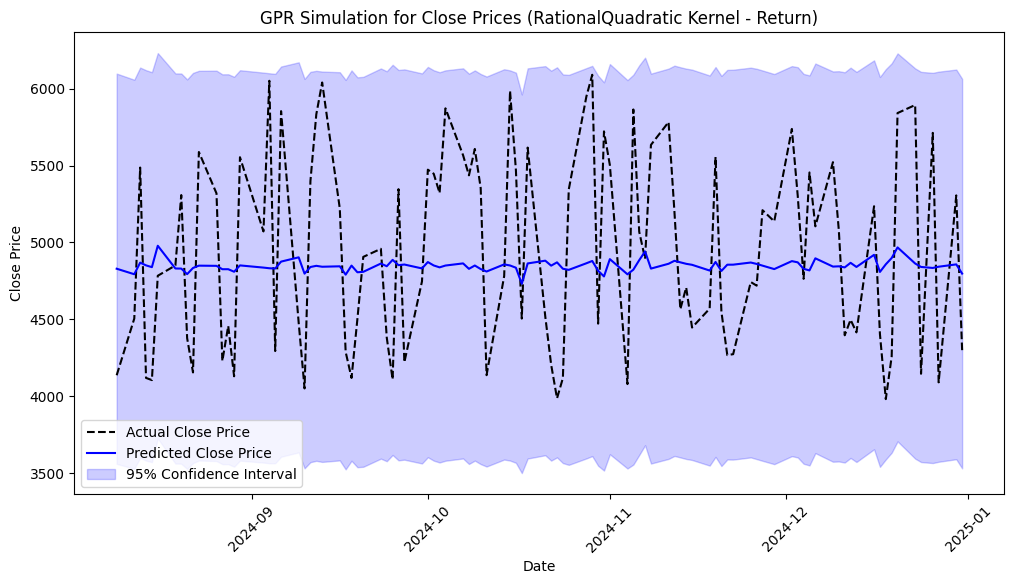

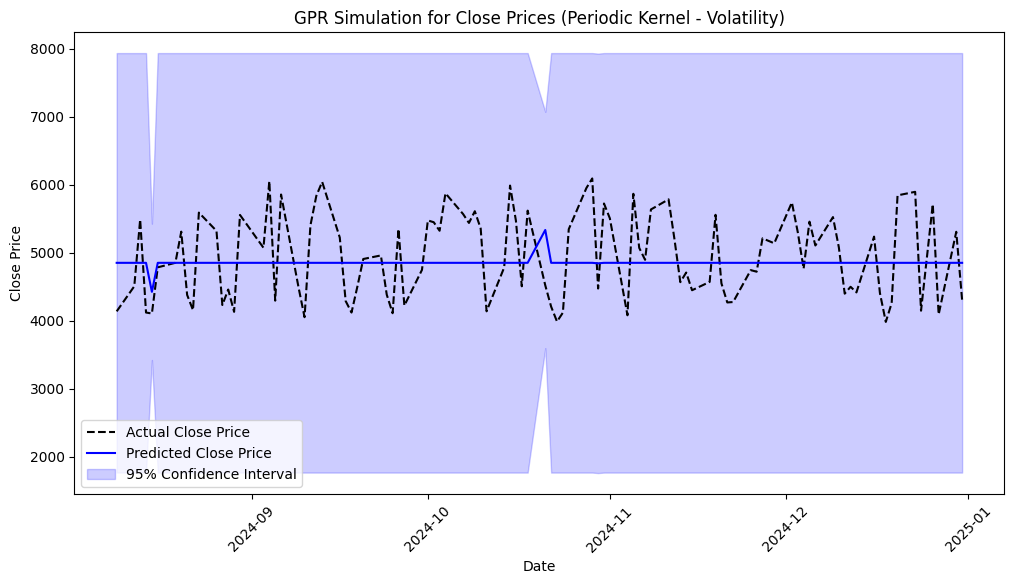

RBF Kernel - Price Range:
MAE: 566.0059
RMSE: 635.0600
Actual Prices in 95% CI: 100.00%


Matern Kernel - Log Volume:
MAE: 566.0059
RMSE: 635.0600
Actual Prices in 95% CI: 100.00%


RationalQuadratic Kernel - Return:
MAE: 559.3924
RMSE: 628.5143
Actual Prices in 95% CI: 99.78%


Periodic Kernel - Volatility:
MAE: 566.4954
RMSE: 635.8025
Actual Prices in 95% CI: 99.70%




In [33]:


# Generate test dates
test_dates = sp500.index[-len(y_test):]

# Plot predictions for each trained model
for name, model in models.items():
    try:
        y_pred, std_dev = model.predict(X_test, return_std=True)
        y_lower, y_upper = y_pred - 1.96 * std_dev, y_pred + 1.96 * std_dev

        sorted_indices = np.argsort(test_dates)
        test_dates_sorted = test_dates[sorted_indices]
        y_test_sorted, y_pred_sorted = y_test[sorted_indices], y_pred[sorted_indices]
        y_lower_sorted, y_upper_sorted = y_lower[sorted_indices], y_upper[sorted_indices]

        plt.figure(figsize=(12, 6))
        plt.plot(test_dates_sorted, y_test_sorted, label="Actual Close Price", color="black", linestyle="dashed")
        plt.plot(test_dates_sorted, y_pred_sorted, label="Predicted Close Price", color="blue")
        plt.fill_between(test_dates_sorted, y_lower_sorted, y_upper_sorted, color="blue", alpha=0.2, label="95% Confidence Interval")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.title(f"GPR Simulation for Close Prices ({name})")
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()
    except Exception as e:
        print(f"❌ Error in {name}: {e}")

# Evaluate models
evaluation_results = []
for name, model in models.items():
    try:
        y_pred, std_dev = model.predict(X_test, return_std=True)
        y_lower, y_upper = y_pred - 1.96 * std_dev, y_pred + 1.96 * std_dev

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        within_interval = ((y_test >= y_lower) & (y_test <= y_upper)).sum()
        confidence_coverage = (within_interval / len(y_test))

        evaluation_results.append({
            "Model": name,
            "MAE": mae,
            "RMSE": rmse,
            "Confidence Coverage (%)": confidence_coverage
        })

        print(f"{name}:")
        print(f"MAE: {mae:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"Actual Prices in 95% CI: {confidence_coverage:.2f}%")
        print()
        print()
    except Exception as e:
        print(f"❌ Error in {name}: {e}")


The GPR model could be overfitted if it performs significantly better on the training data compared to the test data. To assess this:

    Compare Training vs. Test Errors
        If the model has a very low Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) on the training set but much higher errors on the test set, this suggests overfitting.
        To confirm, you can compute and print training errors for comparison.

    Confidence Interval Coverage
        If the confidence coverage is high (e.g., >95%) on the training set but much lower on the test set, this indicates that the model is too tailored to the training data and generalizes poorly.

    Kernel Complexity
        The choice of kernels and hyperparameter tuning can lead to excessive complexity. If the estimated kernel parameters are extremely specific, the model may be overfitting to minor variations in training data.

In [35]:

for name, model in models.items():

        y_train_pred, std_dev_train = model.predict(X_train, return_std=True)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        print(f"📊 {name} - Training Performance:")
        print(f"   📉 MAE (Train): {mae_train:.4f}")
        print(f"   📊 RMSE (Train): {rmse_train:.4f}")
        print("-" * 80)


📊 RBF Kernel - Price Range - Training Performance:
   📉 MAE (Train): 0.0057
   📊 RMSE (Train): 0.0065
--------------------------------------------------------------------------------
📊 Matern Kernel - Log Volume - Training Performance:
   📉 MAE (Train): 0.0057
   📊 RMSE (Train): 0.0065
--------------------------------------------------------------------------------
📊 RationalQuadratic Kernel - Return - Training Performance:
   📉 MAE (Train): 0.0057
   📊 RMSE (Train): 0.0065
--------------------------------------------------------------------------------
📊 Periodic Kernel - Volatility - Training Performance:
   📉 MAE (Train): 0.0010
   📊 RMSE (Train): 0.0011
--------------------------------------------------------------------------------


we see that the difference is really significant and it did really over fit on the training data

also
Extremely wide confidence intervals Suggests excessive uncertainty

## part 5

Introduction

Hidden Markov Models (HMMs) are widely utilized for analyzing financial time series due to their strong capability in modeling time-dependent data with underlying, unobservable states. In finance, these hidden states often correspond to distinct market conditions, such as bullish trends, bearish downturns, or periods of high volatility. Understanding these regime shifts is essential for assessing risk, analyzing market behavior, and improving forecasting accuracy. By incorporating Gaussian Mixture Models (GMMs) as emission distributions within HMMs, the model gains the ability to capture the complexity and non-linearity inherent in financial returns more effectively.
Hidden States and Market Regimes

Financial market data, such as asset returns and price movements, are often driven by latent processes that shift over time, leading to different market regimes. These regimes typically include:

    Bullish phases with rising prices and relatively low volatility ,
    Bearish phases characterized by declining prices and potentially higher volatility , and
    High-volatility or transitional phases marked by sudden fluctuations and uncertainty .

HMMs are particularly well-suited for identifying and modeling these regime changes since they describe the transitions between hidden states probabilistically. Each state represents a specific market regime, and the transition probabilities provide valuable insights into how persistent these regimes are and the likelihood of switching between them. This probabilistic framework is instrumental in risk management and in designing adaptive trading strategies.
Benefits of GMM-Based Emissions

Traditional HMMs often assume that observations in each state follow a single Gaussian distribution. However, financial return distributions frequently exhibit characteristics such as skewness, heavy tails, and multimodality, which a single Gaussian distribution cannot adequately represent. Using Gaussian Mixture Models (GMMs) instead allows each hidden state to be modeled as a combination of multiple Gaussian distributions, enabling a more flexible and realistic representation of financial data.

Key advantages of using GMM emissions include:

    Greater Flexibility: GMMs can better capture the intricacies of return distributions by modeling multiple sub-groups within each regime
    Improved Data Fit: The mixture model adapts to asymmetric and heavy-tailed return distributions, leading to better likelihood estimates and enhanced predictive performance .
    Enhanced Interpretability: The different mixture components can sometimes be linked to external economic factors, providing deeper insights into market behavior .

Empirical Findings and Practical Applications

Several studies have demonstrated the effectiveness of HMMs with GMM emissions in financial time series analysis. These models have proven useful in detecting regime shifts and providing early warning signals for market crashes and volatility spikes. Some notable applications include:

    Volatility Prediction: By accurately capturing transitions between low- and high-volatility regimes, these models improve volatility forecasts
    Risk Assessment: Identifying distinct market regimes helps in evaluating tail risks and enhancing hedging strategies
    Algorithmic Trading: Aligning trading strategies with inferred market regimes allows for better timing of entry and exit points, optimizing performance


In our HMM model, we conceptualize the market as switching between distinct hidden states. In our case, we define three states representing different market regimes:
1. **State 0 (Bull Market):** Characterized by rising prices
2. **State 1 (Bear Market):** Characterized by falling prices
3. **State 2 (Sideways/High-Volatility Market):** Represents periods where the market may be moving sideways or experiencing heightened volatility.

These states are not directly observable but are inferred by the HMM based on the statistical properties of the observed financial returns.


In [36]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 4.3 MB/s eta 0:00:00


In [38]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM


start_date = "2000-01-01"
end_date = "2024-01-01"
sp500 = yf.download("^GSPC", start=start_date, end=end_date)


if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = sp500.columns.get_level_values(0)

sp500_clean = sp500.replace(0, np.nan).dropna(subset=["Close"])


log_prices = np.log(sp500_clean['Close'])
log_returns = np.diff(log_prices).reshape(-1, 1)  # Reshape to 2D array for hmmlearn
log_returns

[*********************100%***********************]  1 of 1 completed


array([[-0.03909918],
       [ 0.00192034],
       [ 0.00095522],
       ...,
       [ 0.00142944],
       [ 0.00037011],
       [-0.00283048]])

fitting
fitting completed!
Learned Transition Matrix (between hidden states):
[[1.16648956e-02 9.88322748e-01 1.23562326e-05]
 [9.46642338e-01 3.50816654e-02 1.82759965e-02]
 [1.41660292e-02 1.12166436e-03 9.84712306e-01]]


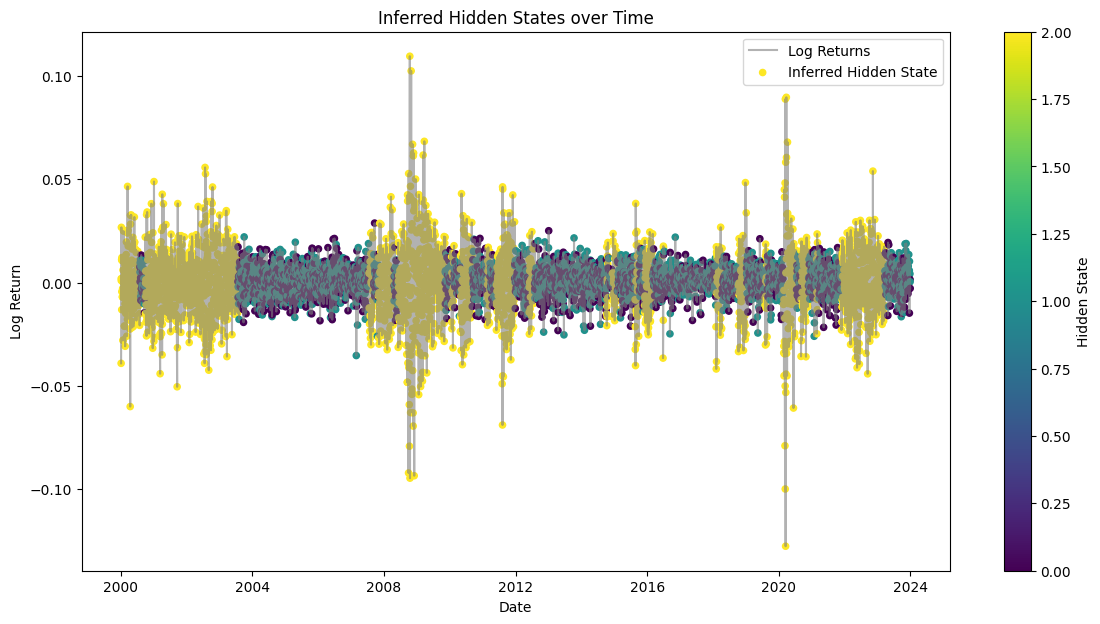

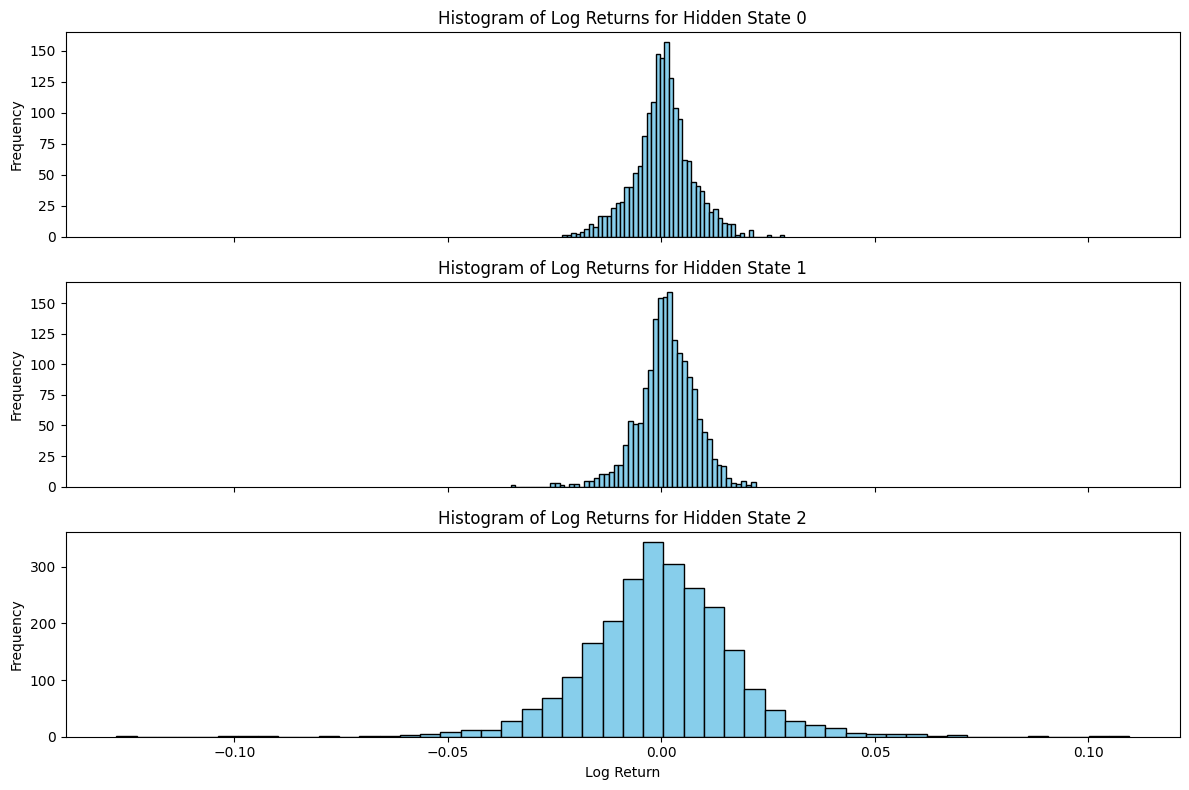

In [43]:


# Function to initialize and fit the GMM-HMM model
def fit_gmm_hmm_model(log_returns, n_components=3, n_mix=3, n_iter=100, random_state=42):
    # Initialize the GMM-HMM model
    model = GMMHMM(n_components=n_components, n_mix=n_mix, covariance_type="full", n_iter=n_iter, random_state=random_state)

    # Fit the model to the log returns data
    print("fitting")
    model.fit(log_returns)
    print("fitting completed!")

    return model

# Function to display the learned transition matrix
def display_transition_matrix(model):
    print("Learned Transition Matrix (between hidden states):")
    print(model.transmat_)

# Function to plot log returns with color-coded hidden states
def plot_log_returns_with_states(log_returns, hidden_states, sp500_clean):
    plt.figure(figsize=(14, 7))
    plt.plot(sp500_clean.index[1:], log_returns, label="Log Returns", alpha=0.6, color='grey')
    plt.scatter(sp500_clean.index[1:], log_returns, c=hidden_states, cmap="viridis", label="Inferred Hidden State", marker='o', s=20)
    plt.title("Inferred Hidden States over Time")
    plt.xlabel("Date")
    plt.ylabel("Log Return")
    plt.legend()
    plt.colorbar(label="Hidden State")
    plt.show()

# Function to plot histograms of log returns per hidden state
def plot_histograms_of_log_returns(log_returns, hidden_states, n_components):
    fig, axes = plt.subplots(n_components, 1, figsize=(12, 8), sharex=True)
    for state in range(n_components):
        state_returns = log_returns[hidden_states == state]
        axes[state].hist(state_returns, bins=50, color='skyblue', edgecolor='black')
        axes[state].set_title(f"Histogram of Log Returns for Hidden State {state}")
        axes[state].set_ylabel("Frequency")
    axes[-1].set_xlabel("Log Return")
    plt.tight_layout()
    plt.show()

# Main workflow to fit model and generate plots
def main(log_returns, sp500_clean, n_components=3, n_mix=2):
    model = fit_gmm_hmm_model(log_returns, n_components, n_mix)

    # Inspect learned parameters
    display_transition_matrix(model)

    # Get predicted hidden states
    hidden_states = model.predict(log_returns)

    # Visualize results
    plot_log_returns_with_states(log_returns, hidden_states, sp500_clean)
    plot_histograms_of_log_returns(log_returns, hidden_states, n_components)

# Call the main function to execute the workflow
main(log_returns, sp500_clean)


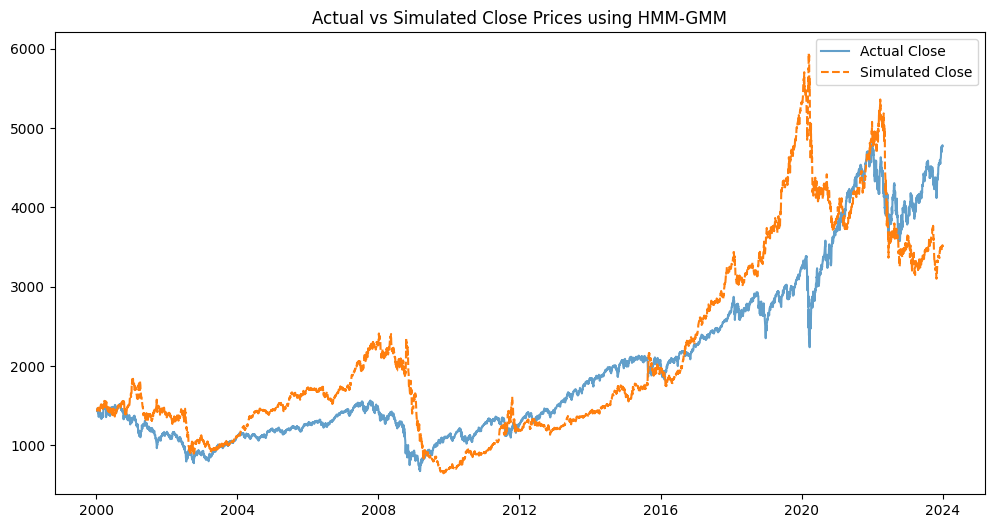

MAE: 415.9353
RMSE: 577.2852


In [50]:
sp500["log_return"] = np.log(sp500["Close"] / sp500["Close"].shift(1))
sp500.dropna(inplace=True)



X = sp500[["log_return"]].values


hmm = GMMHMM(n_components=3, n_iter=500)
hmm.fit(X)

# Predict hidden states
sp500["state"] = hmm.predict(X)

# Simulate Close price paths
simulated_prices = [sp500["Close"].iloc[0]]
states = hmm.predict(X)

for i in range(1, len(sp500)):
    state = states[i]
    mean, cov = hmm.means_[state], hmm.covars_[state]
    simulated_return = np.random.normal(mean.item(), np.sqrt(cov).item())
    simulated_price = simulated_prices[-1] * np.exp(simulated_return)
    simulated_prices.append(simulated_price)

sp500["simulated_close"] = simulated_prices

# Compute MAE and RMSE
mae = mean_absolute_error(sp500["Close"], sp500["simulated_close"])
rmse = np.sqrt(mean_squared_error(sp500["Close"], sp500["simulated_close"]))

# Plot actual vs simulated Close prices
plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500["Close"], label="Actual Close", alpha=0.7)
plt.plot(sp500.index, sp500["simulated_close"], label="Simulated Close", linestyle="dashed")
plt.legend()
plt.title("Actual vs Simulated Close Prices using HMM-GMM")
plt.show()

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


In a Hidden Markov Model (HMM) applied to financial data (like log returns of an asset such as the S&P 500), the hidden states correspond to unobserved, latent regimes or market conditions that influence the observed returns. These states don't directly correspond to observable variables (like market prices), but they capture hidden factors affecting the market.

Given the context of the market, the 3 hidden states you have are labeled as Bull, Bear, and Sideways/High Volatility, which suggests the following interpretations:

    Bull Market (State 0):
        This state is likely associated with periods when the market is in an upward trend.
        Log returns in this state should show positive returns, indicating a rising market.
        This state may correspond to periods of economic expansion, optimism, and investor confidence.

    Bear Market (State 1):
        This state is associated with declining market conditions, i.e., a negative trend in the asset price.
        Log returns here would likely show negative returns.
        A bear market state might reflect periods of economic contraction, pessimism, or uncertainty.

    Sideways/High Volatility (State 2):
        This state might represent periods of market indecisiveness, ranging or fluctuating behavior (sideways), or high volatility.
        Returns in this state could be mixed (both positive and negative), but the key feature would be the unpredictability of the market, as it’s neither in a stable uptrend nor downtrend.
        This could correspond to periods of market correction, geopolitical uncertainty, or other factors that create more noise in the market.

Could the HMM Model Be Overfitted?

Overfitting refers to the situation where a model captures noise or random fluctuations in the data rather than underlying trends, leading to poor generalization to new data.

In the context of your GMM-HMM model, here are some ways the model could be overfitted:

    Model Complexity:
        Too Many Hidden States or Mixture Components: You have defined n_components=3 hidden states and n_mix=2 Gaussian mixture components per state. If the number of hidden states and mixture components is too high, the model may become too complex and may fit the noise or random patterns in the data rather than capturing real underlying market dynamics. This could result in overfitting.
        Model Performance on Validation Data: A good test of overfitting is how the model performs on a separate validation dataset. If your model performs well on the training data but poorly on the validation data, this is a strong indicator of overfitting.

    Convergence and Number of Iterations:
        If the number of iterations (n_iter=100) is too high, the model might overfit to the specific data it’s trained on. The model may converge to a solution that is too tightly fit to the training set and won't generalize well. It’s often useful to monitor the log-likelihood or other model diagnostics to see if the performance plateaus too early or continues improving with more iterations.

    Excessive Flexibility in the GMM:
        The Gaussian Mixture Model (GMM) in the HMM has parameters (means, covariances) that can be highly flexible. Too many mixture components (e.g., n_mix=2) could lead to overfitting, where the GMM tries to explain too much of the variation in the data, leading to an overly complex model that doesn’t generalize well.

    Lack of Regularization:
        The model doesn’t include regularization parameters (such as constraints on covariance matrices in GMM), which means it might capture spurious relationships in the data if too many mixture components are specified. This could lead to overfitting, especially if the data is noisy or if there are too few observations for the number of parameters.

Risk of Overfitting and Justification:

    Risk: The risk of overfitting is higher if:
        The model complexity (hidden states and mixture components) is too large relative to the amount of data.
        The model fits perfectly to training data but does poorly on new, unseen data (out-of-sample testing).
        The likelihood or model performance (on training data) shows diminishing returns after a certain number of iterations.

    Justification:
        Model Complexity: If your data is noisy, using a high number of components and states can lead to capturing noise rather than genuine market trends.
        Performance Monitoring: If the model fits very well but doesn’t generalize, overfitting is a concern. Checking performance on out-of-sample data or using cross-validation can help diagnose overfitting.
        Validation Measures: Plotting the likelihood curve and cross-validation (using different data splits or holdout validation sets) can give more insight into whether the model is overfitting.

In [53]:
for i in range(3):
    print(f"State {i}: Mean Return = {hmm.means_[i][0]}, Variance = {hmm.covars_[i][0][0]}")

State 0: Mean Return = [0.00103029], Variance = 3.080137513065067e-05
State 1: Mean Return = [-0.00210731], Variance = 0.0008404003969827046
State 2: Mean Return = [-0.00021941], Variance = 0.00014309813994245417


we can conclude from the numbers above that state 0 is increasing
state 1 is decreasing
state 2 is flat

## part 6

Hidden Markov Models (HMMs) and regime-switching models are widely utilized in financial applications to capture the dynamic behavior of markets and enhance portfolio management strategies. These models aim to identify distinct market regimes—such as bull and bear markets—and adjust investment decisions accordingly.

HMM-Based Trading Strategies:

HMMs are employed to model the probabilistic transitions between unobserved market states. By analyzing observable financial data, these models infer the hidden states and predict future market movements. For instance, Erlwein et al. (2011) developed investment strategies that allocate funds between growth and value stocks based on filtered market states identified by HMMs. Their findings suggest that such switching strategies can outperform static investment approaches in terms of risk-adjusted returns.
ONLINELIBRARY.WILEY.COM

In another study, Fons et al. (2019) introduced a dynamic asset allocation system using Feature Saliency Hidden Markov Models (FSHMMs) for smart beta investing. This approach not only improved regime identification but also enhanced portfolio performance, achieving up to 60% excess returns annually compared to market benchmarks.
ARXIV.ORG

Regime-Switching Models in Portfolio Management:

Regime-switching models extend the traditional mean-variance optimization framework by incorporating multiple market regimes, each characterized by distinct return distributions and risk profiles. Chen and Yang (2011) explored a multi-period asset-liability management model with regime switching, demonstrating that optimal portfolio strategies should adapt to changing economic conditions to achieve better performance.
TANDFONLINE.COM

Similarly, Costa and Kwon (2020) proposed a regime-switching factor model for mean-variance optimization, allowing portfolios to align with prevailing market conditions. Their empirical analysis indicated that regime-dependent portfolios yielded higher returns and lower volatility compared to traditional single-regime models.
PAPERS.SSRN.COM

Performance and Common Approaches:

Common approaches in applying HMMs and regime-switching models involve:

Regime Identification: Utilizing statistical techniques to detect different market states based on historical data.

Dynamic Allocation: Adjusting portfolio weights in response to identified regimes to capitalize on favorable conditions and mitigate risks.

Risk Management: Employing alternative risk measures, such as Conditional Value at Risk (CVaR), to account for regime-dependent risk characteristics.

Studies consistently report that incorporating regime-switching mechanisms into trading and portfolio strategies can lead to improved risk-adjusted performance. By dynamically adjusting to market conditions, these models offer a more responsive approach compared to static strategies, thereby enhancing returns and reducing volatility.

###HMM-Based Trading Strategy
This trading strategy uses a Hidden Markov Model (HMM) to classify market regimes and adjust trading decisions accordingly. The model identifies hidden market states—such as bull, bear, and neutral (sideways)—based on historical asset price movements, volatility, and trading volume.

1. Define Market Regimes Using HMM
We assume the market operates in three states:

Bull Market (State 1): Prices trend upward, volatility is low to moderate.
Bear Market (State 2): Prices trend downward, high volatility.
Sideways Market (State 3): No clear trend, moderate volatility.
Feature Selection for HMM
To train the HMM, we use the following features from asset prices:

Log Returns:
log
⁡
(
𝑃
𝑡
/
𝑃
𝑡
−
1
)
log(P
t
​
 /P
t−1
​
 )
Volatility: Rolling standard deviation of returns (e.g., 20-day).
Trading Volume: Normalized volume levels.
Momentum Indicators: Simple Moving Averages (SMA) or Relative Strength Index (RSI).
2. Train the HMM Model
Use Gaussian HMM with three hidden states.
Train the model on historical data using Expectation-Maximization (EM).
Fit the model to estimate transition probabilities between states.
3. Define Trading Rules Based on HMM States
HMM State	Market Regime	Trading Action
State 1	Bull Market	Go long on assets
State 2	Bear Market	Go short or stay in cash
State 3	Sideways	Reduce position sizes, trade mean-reverting strategies
4. Backtesting & Performance Evaluation
Apply the trained HMM to out-of-sample data.
Simulate trades based on the inferred market regimes.
Use Sharpe Ratio, Maximum Drawdown, and CAGR to assess performance.
5. Optimization & Risk Management
Adjust position sizing using Kelly Criterion or Volatility Targeting.
Implement stop-loss and take-profit levels to control risk.
Optimize lookback periods and HMM parameters (number of states, feature selection).
Expected Performance
The model dynamically adapts to market changes.
Reduces drawdowns during bear markets.
Potentially outperforms static strategies in volatile markets.

In [72]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from hmmlearn.hmm import GMMHMM
from sklearn.preprocessing import StandardScaler


start_date = "2010-01-01"
end_date = "2025-01-01"

sp500 = yf.download("^GSPC", start=start_date, end=end_date)
sp500["Returns"] = np.log(sp500["Close"] / sp500["Close"].shift(1))
sp500["Volatility"] = sp500["Returns"].rolling(window=20).std()
sp500.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


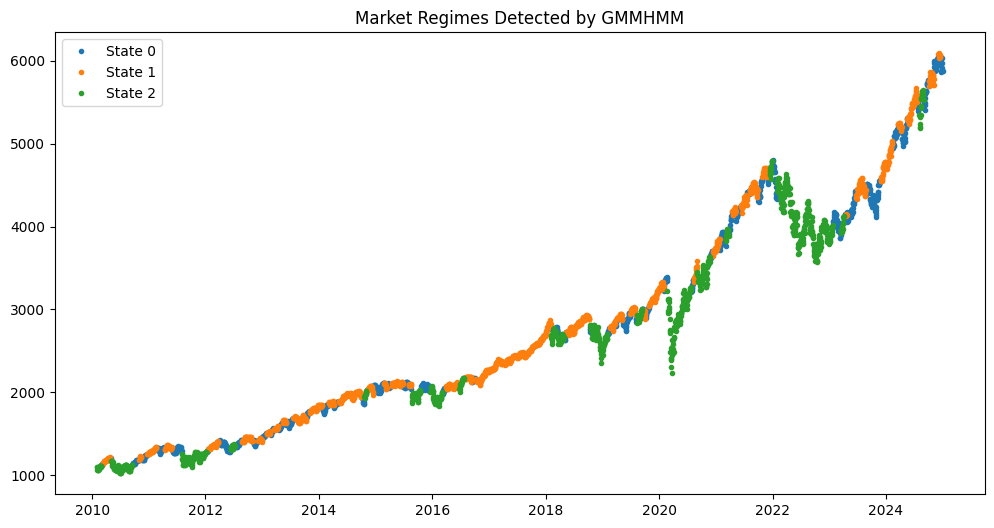

In [73]:
# Ensure there are no NaN or infinite values
sp500.replace([np.inf, -np.inf], np.nan, inplace=True)
sp500.dropna(inplace=True)

# Feature scaling
features = sp500[["Returns", "Volatility"]].values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Verify the dataset does not contain NaNs or infs
assert not np.isnan(scaled_features).any(), "NaNs detected in feature set"
assert not np.isinf(scaled_features).any(), "Infs detected in feature set"

# Train GMMHMM
n_states = 3  # Assume three market regimes: bull, bear, and sideways
gmmhmm = GMMHMM(n_components=n_states, n_mix=2, covariance_type="full", n_iter=1000, random_state=42)
gmmhmm.fit(scaled_features)

# Decode market states
hidden_states = gmmhmm.predict(scaled_features)
sp500["State"] = hidden_states

# Plot results
plt.figure(figsize=(12, 6))
for state in range(n_states):
    plt.plot(sp500.index[sp500["State"] == state], sp500["Close"][sp500["State"] == state], ".", label=f"State {state}")
plt.legend()
plt.title("Market Regimes Detected by GMMHMM")
plt.show()


In [74]:
for i in range(3):
    print(f"State {i}: Mean Return = {gmmhmm.means_[i][0]}, Variance = {gmmhmm.covars_[i][0][0]}")

State 0: Mean Return = [ 0.01005548 -0.07016313], Variance = [0.64593666 0.01202602]
State 1: Mean Return = [-0.04969811 -0.48643036], Variance = [0.47517842 0.00972061]
State 2: Mean Return = [-0.2770346   4.28855843], Variance = [13.0984429   1.21204965]


Let's backtest the HMM-based trading strategy using historical S&P 500 data and calculate the cumulative returns. The strategy follows these rules:

Bull Market (State 0) → Go Long (Invest in S&P 500)
Bear Market (State 1) → Go Short (Short S&P 500)
Sideways Market (State 2) → Stay in Cash (No Position)

In [75]:
# Define strategy positions based on detected states
sp500["Position"] = 0  # Default: Stay in cash

# Long when in Bull Market (State 0)
sp500.loc[sp500["State"] == 0, "Position"] = 1

# Short when in Bear Market (State 1)
sp500.loc[sp500["State"] == 1, "Position"] = -1

# Stay in cash when in Sideways Market (State 2) (Position remains 0)

# Calculate strategy returns
sp500["Strategy Returns"] = sp500["Position"].shift(1) * sp500["Returns"]

# Compute cumulative returns
sp500["Cumulative Market Returns"] = sp500["Returns"].cumsum().apply(np.exp)
sp500["Cumulative Strategy Returns"] = sp500["Strategy Returns"].cumsum().apply(np.exp)


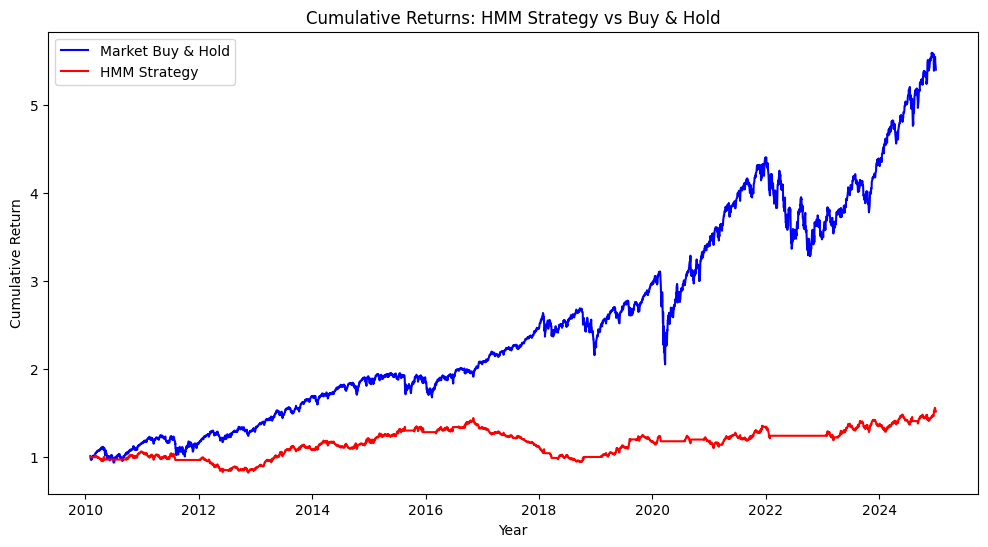

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500["Cumulative Market Returns"], label="Market Buy & Hold", color="blue")
plt.plot(sp500.index, sp500["Cumulative Strategy Returns"], label="HMM Strategy", color="red")
plt.legend()
plt.title("Cumulative Returns: HMM Strategy vs Buy & Hold")
plt.xlabel("Year")
plt.ylabel("Cumulative Return")
plt.show()


In [78]:
# Calculate final returns
final_market_return = sp500["Cumulative Market Returns"].iloc[-1]
final_strategy_return = sp500["Cumulative Strategy Returns"].iloc[-1]

# Calculate Sharpe Ratio
sharpe_ratio = sp500["Strategy Returns"].mean() / sp500["Strategy Returns"].std() * np.sqrt(252)

print(f"Final Market Return: {final_market_return:.2f}")
print(f"Final Strategy Return: {final_strategy_return:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Final Market Return: 5.40
Final Strategy Return: 1.52
Sharpe Ratio: 0.28


this happend because we did not use a good action with each state
now lets do a little more clever:

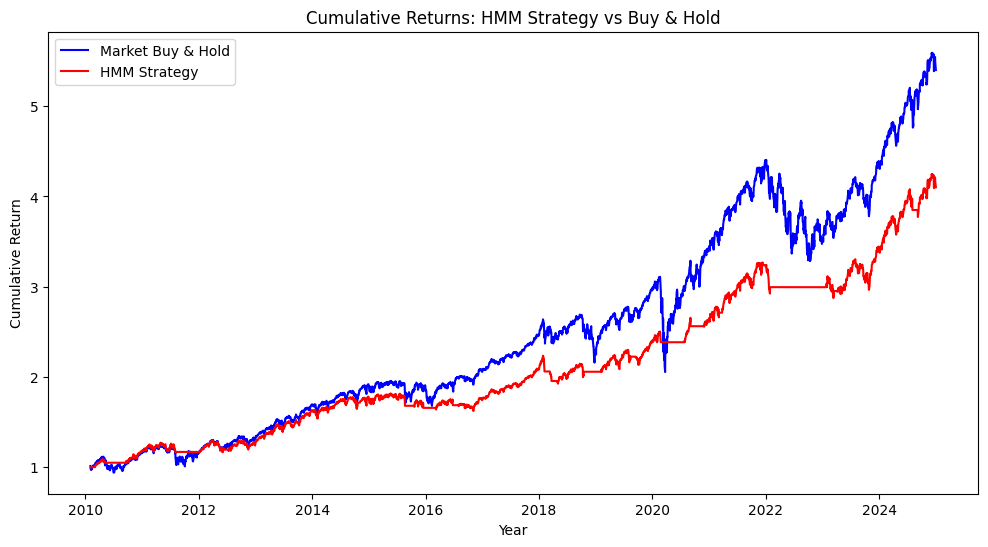

Final Market Return: 5.40
Final Strategy Return: 4.10
Sharpe Ratio: 0.93


In [85]:
# Define strategy positions based on detected states
sp500["Position"] = 0  # Default: Stay in cash


sp500.loc[sp500["State"] == 1, "Position"] = 1


sp500.loc[sp500["State"] == 0, "Position"] = 1

# Stay in cash when in Sideways Market (State 2) (Position remains 0)

# Calculate strategy returns
sp500["Strategy Returns"] = sp500["Position"].shift(1) * sp500["Returns"]

# Compute cumulative returns
sp500["Cumulative Market Returns"] = sp500["Returns"].cumsum().apply(np.exp)
sp500["Cumulative Strategy Returns"] = sp500["Strategy Returns"].cumsum().apply(np.exp)

plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500["Cumulative Market Returns"], label="Market Buy & Hold", color="blue")
plt.plot(sp500.index, sp500["Cumulative Strategy Returns"], label="HMM Strategy", color="red")
plt.legend()
plt.title("Cumulative Returns: HMM Strategy vs Buy & Hold")
plt.xlabel("Year")
plt.ylabel("Cumulative Return")
plt.show()



# Calculate final returns
final_market_return = sp500["Cumulative Market Returns"].iloc[-1]
final_strategy_return = sp500["Cumulative Strategy Returns"].iloc[-1]

# Calculate Sharpe Ratio
sharpe_ratio = sp500["Strategy Returns"].mean() / sp500["Strategy Returns"].std() * np.sqrt(252)

print(f"Final Market Return: {final_market_return:.2f}")
print(f"Final Strategy Return: {final_strategy_return:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


maybe the states where not enough. lets use 4:

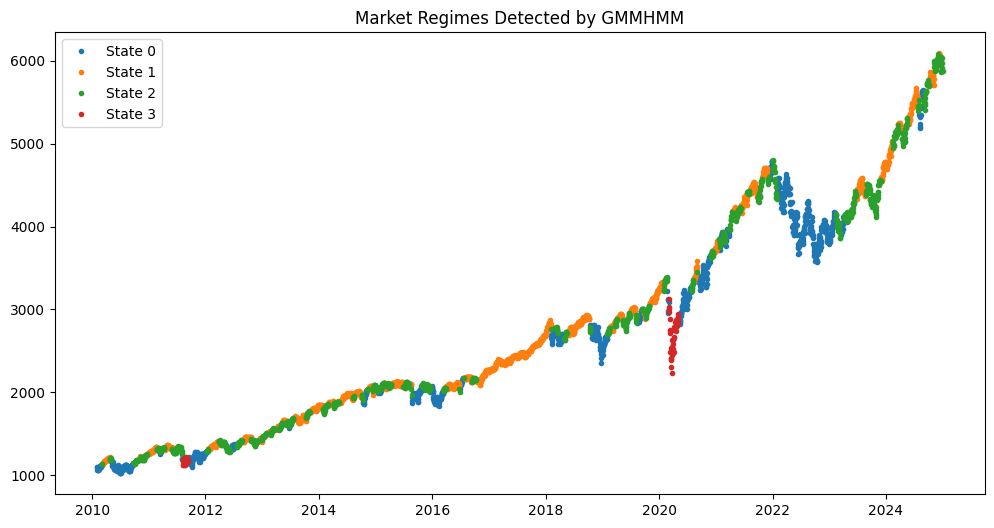

In [86]:
n_states = 4  # Assume three market regimes: bull, bear, and sideways
gmmhmm = GMMHMM(n_components=n_states, n_mix=2, covariance_type="full", n_iter=1000, random_state=42)
gmmhmm.fit(scaled_features)

# Decode market states
hidden_states = gmmhmm.predict(scaled_features)
sp500["State"] = hidden_states

# Plot results
plt.figure(figsize=(12, 6))
for state in range(n_states):
    plt.plot(sp500.index[sp500["State"] == state], sp500["Close"][sp500["State"] == state], ".", label=f"State {state}")
plt.legend()
plt.title("Market Regimes Detected by GMMHMM")
plt.show()


In [88]:
for i in range(4):
    print(f"State {i}: Mean Return = {gmmhmm.means_[i][0]}, Variance = {gmmhmm.covars_[i][0][0]}")

State 0: Mean Return = [-0.18429374  1.22253565], Variance = [2.40960256 0.13751222]
State 1: Mean Return = [ 0.05556226 -0.76835145], Variance = [0.15832505 0.00504407]
State 2: Mean Return = [-1.56225077 -0.03751698], Variance = [ 0.48855761 -0.01558578]
State 3: Mean Return = [-0.252066    3.35982316], Variance = [10.06105693  0.47060981]


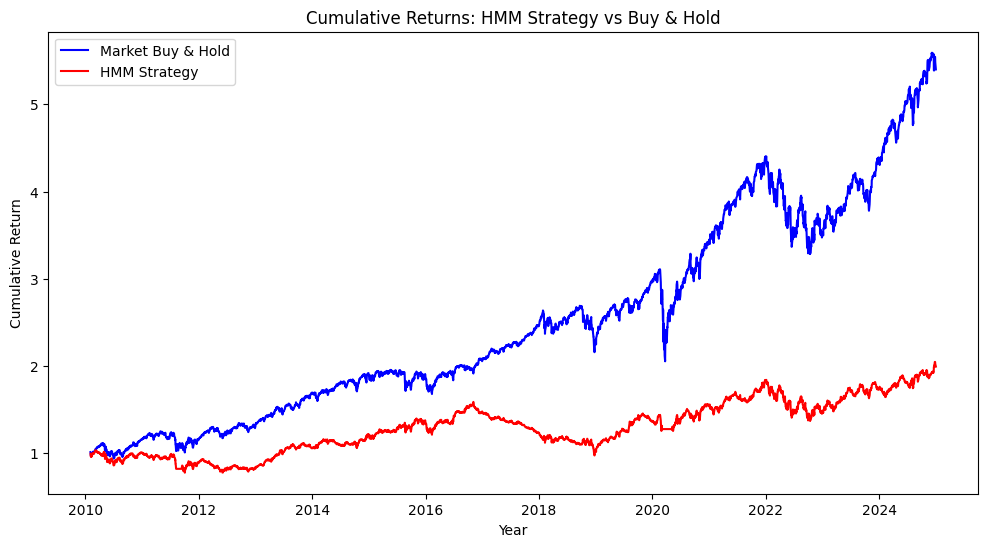

Final Market Return: 5.40
Final Strategy Return: 1.99
Sharpe Ratio: 0.30


In [91]:
# Define strategy positions based on detected states
sp500["Position"] = 0  # Default: Stay in cash


sp500.loc[sp500["State"] == 2, "Position"] = 1


sp500.loc[sp500["State"] == 0, "Position"] = 1

sp500.loc[sp500["State"] == 1, "Position"] = -1

# Stay in cash when in Sideways Market (State 2) (Position remains 0)

# Calculate strategy returns
sp500["Strategy Returns"] = sp500["Position"].shift(1) * sp500["Returns"]

# Compute cumulative returns
sp500["Cumulative Market Returns"] = sp500["Returns"].cumsum().apply(np.exp)
sp500["Cumulative Strategy Returns"] = sp500["Strategy Returns"].cumsum().apply(np.exp)

plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500["Cumulative Market Returns"], label="Market Buy & Hold", color="blue")
plt.plot(sp500.index, sp500["Cumulative Strategy Returns"], label="HMM Strategy", color="red")
plt.legend()
plt.title("Cumulative Returns: HMM Strategy vs Buy & Hold")
plt.xlabel("Year")
plt.ylabel("Cumulative Return")
plt.show()



# Calculate final returns
final_market_return = sp500["Cumulative Market Returns"].iloc[-1]
final_strategy_return = sp500["Cumulative Strategy Returns"].iloc[-1]

# Calculate Sharpe Ratio
sharpe_ratio = sp500["Strategy Returns"].mean() / sp500["Strategy Returns"].std() * np.sqrt(252)

print(f"Final Market Return: {final_market_return:.2f}")
print(f"Final Strategy Return: {final_strategy_return:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


now that we played with these parameters lets add new feature

Why Add Volume-Based Features?


Trading Volume can indicate market strength. High volume often confirms trends, while low volume may signal reversals.
Relative Volume compares current volume to historical averages, identifying anomalies.
Volume-Weighted Volatility measures price dispersion based on trading activity.

In [97]:

sp500 = yf.download("^GSPC", start=start_date, end=end_date)

sp500["Returns"] = np.log(sp500["Close"] / sp500["Close"].shift(1))

# Calculate rolling volatility
sp500["Volatility"] = sp500["Returns"].rolling(window=20).std()

# Volume-related features
sp500["Volume Change"] = np.log(sp500["Volume"] / sp500["Volume"].shift(1))  # Log change in volume
sp500["Relative Volume"] = sp500["Volume"] / sp500["Volume"].rolling(20).mean()  # Relative volume vs. past 20 days
sp500["Volume-Weighted Volatility"] = sp500["Volatility"] * sp500["Relative Volume"]

# Drop NaN values
sp500.dropna(inplace=True)

# Feature engineering
features = sp500[["Returns", "Volatility", "Volume Change", "Relative Volume", "Volume-Weighted Volatility"]].values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Train the HMM model with additional volume features
n_states = 4
gmmhmm = GMMHMM(n_components=n_states, n_mix=3, covariance_type="full", n_iter=300, random_state=42)
gmmhmm.fit(scaled_features)

# Decode hidden market states
hidden_states = gmmhmm.predict(scaled_features)
sp500["State"] = hidden_states

[*********************100%***********************]  1 of 1 completed


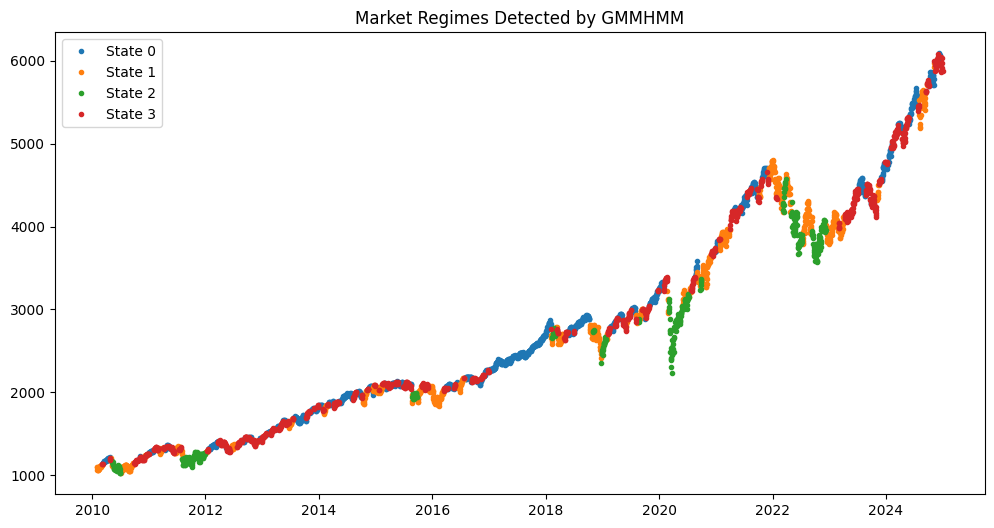

State 0: Mean Return = [ 0.03126965 -0.70684835 -0.08696462 -0.23614974 -0.7090113 ], Variance = [ 0.18715934  0.00333645 -0.0515332  -0.03136733 -0.00164054]
State 1: Mean Return = [ 0.15149074  0.60234895 -0.08233362 -0.38472747  0.44152628], Variance = [ 1.00815541 -0.00232868 -0.03515913 -0.00855575 -0.0065477 ]
State 2: Mean Return = [1.51907688 8.04325851 0.01431474 0.15594078 7.76939361], Variance = [15.99695288 -1.30894651 -0.15202153  0.8837269  -0.23090534]
State 3: Mean Return = [ 0.00969754 -0.08404865  0.05153896  0.08823    -0.05482403], Variance = [ 0.5805511   0.00203696 -0.08676763 -0.07267441 -0.01628028]


In [99]:
plt.figure(figsize=(12, 6))
for state in range(n_states):
    plt.plot(sp500.index[sp500["State"] == state], sp500["Close"][sp500["State"] == state], ".", label=f"State {state}")
plt.legend()
plt.title("Market Regimes Detected by GMMHMM")
plt.show()

for i in range(4):
    print(f"State {i}: Mean Return = {gmmhmm.means_[i][0]}, Variance = {gmmhmm.covars_[i][0][0]}")

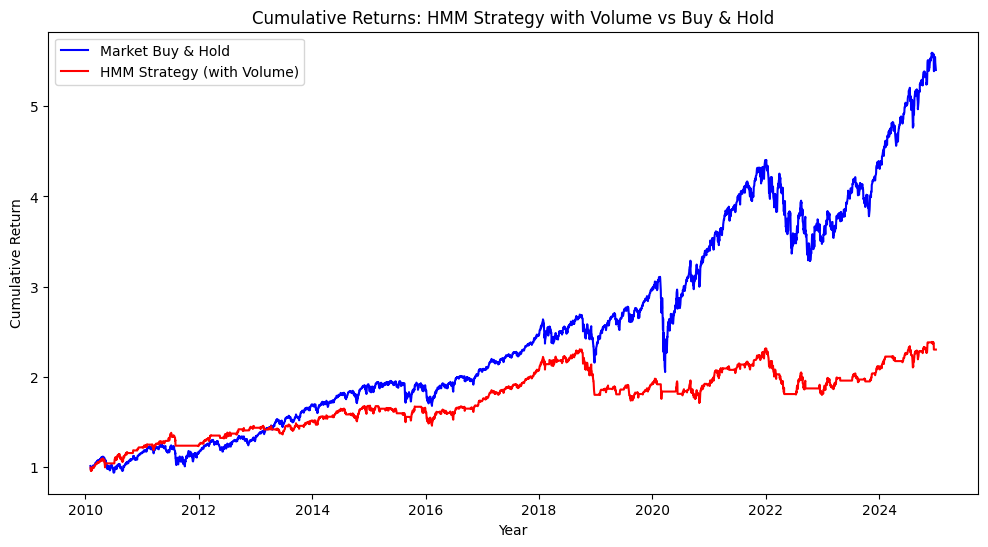

Final Market Return: 5.40
Final Strategy Return (With Volume Features): 2.30
Sharpe Ratio: 0.49


In [109]:
# Define positions based on detected states
sp500["Position"] = 0  # Default: Stay in cash


sp500.loc[sp500["State"] == 0, "Position"] = 1


sp500.loc[sp500["State"] == 1, "Position"] = 1


# Stay in cash when in Sideways Market (State 2)

# Compute strategy returns
sp500["Strategy Returns"] = sp500["Position"].shift(1) * sp500["Returns"]

# Compute cumulative returns
sp500["Cumulative Market Returns"] = sp500["Returns"].cumsum().apply(np.exp)
sp500["Cumulative Strategy Returns"] = sp500["Strategy Returns"].cumsum().apply(np.exp)


plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500["Cumulative Market Returns"], label="Market Buy & Hold", color="blue")
plt.plot(sp500.index, sp500["Cumulative Strategy Returns"], label="HMM Strategy (with Volume)", color="red")
plt.legend()
plt.title("Cumulative Returns: HMM Strategy with Volume vs Buy & Hold")
plt.xlabel("Year")
plt.ylabel("Cumulative Return")
plt.show()


# Calculate final returns
final_market_return = sp500["Cumulative Market Returns"].iloc[-1]
final_strategy_return = sp500["Cumulative Strategy Returns"].iloc[-1]

# Calculate Sharpe Ratio
sharpe_ratio = sp500["Strategy Returns"].mean() / sp500["Strategy Returns"].std() * np.sqrt(252)

print(f"Final Market Return: {final_market_return:.2f}")
print(f"Final Strategy Return (With Volume Features): {final_strategy_return:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")



we see that we can now have beter results and have more descriptive hidden states

now we will show buy and sell on our graph:

In [118]:
sp500 = yf.download("^GSPC", start=start_date, end=end_date)

# Compute log returns and volatility
sp500["Returns"] = np.log(sp500["Close"] / sp500["Close"].shift(1))
sp500["Volatility"] = sp500["Returns"].rolling(window=20).std()

# Compute volume-related features
sp500["Volume Change"] = np.log(sp500["Volume"] / sp500["Volume"].shift(1))
sp500["Relative Volume"] = sp500["Volume"] / sp500["Volume"].rolling(20).mean()
sp500["Volume-Weighted Volatility"] = sp500["Volatility"] * sp500["Relative Volume"]

# Drop NaN values
sp500.dropna(inplace=True)

# Feature set with volume
features = sp500[["Returns", "Volatility", "Volume Change", "Relative Volume", "Volume-Weighted Volatility"]].values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Train HMM model
n_states = 3
gmmhmm = GMMHMM(n_components=n_states, n_mix=2, covariance_type="full", n_iter=300, random_state=42)
gmmhmm.fit(scaled_features)

# Decode market states
hidden_states = gmmhmm.predict(scaled_features)
sp500["State"] = hidden_states

[*********************100%***********************]  1 of 1 completed


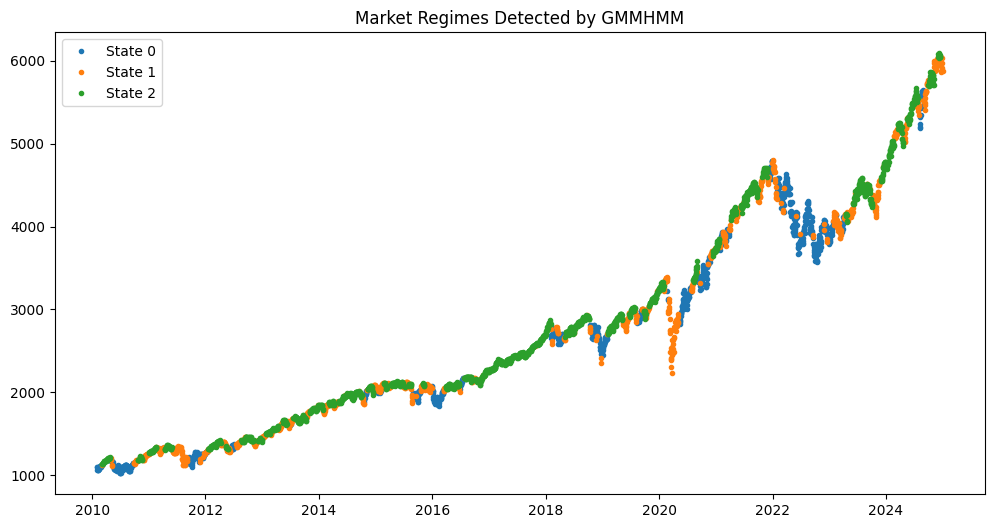

State 0: Mean Return = [ 0.03409888  0.54776895  0.00385566 -0.09065308  0.5012211 ], Variance = [ 1.21474829 -0.00578474 -0.07640865 -0.11532324 -0.04881622]
State 1: Mean Return = [ 0.00690409 -0.05123551 -0.01703721  0.08001918 -0.02437132], Variance = [ 0.67425844  0.00751394 -0.08411621 -0.0807992  -0.01274466]
State 2: Mean Return = [ 0.031537   -0.81188366  0.0021056   0.03452849 -0.77093494], Variance = [ 0.17094022  0.00038877 -0.03085407 -0.02266969 -0.00298035]


In [120]:
plt.figure(figsize=(12, 6))
for state in range(n_states):
    plt.plot(sp500.index[sp500["State"] == state], sp500["Close"][sp500["State"] == state], ".", label=f"State {state}")
plt.legend()
plt.title("Market Regimes Detected by GMMHMM")
plt.show()

for i in range(3):
    print(f"State {i}: Mean Return = {gmmhmm.means_[i][0]}, Variance = {gmmhmm.covars_[i][0][0]}")

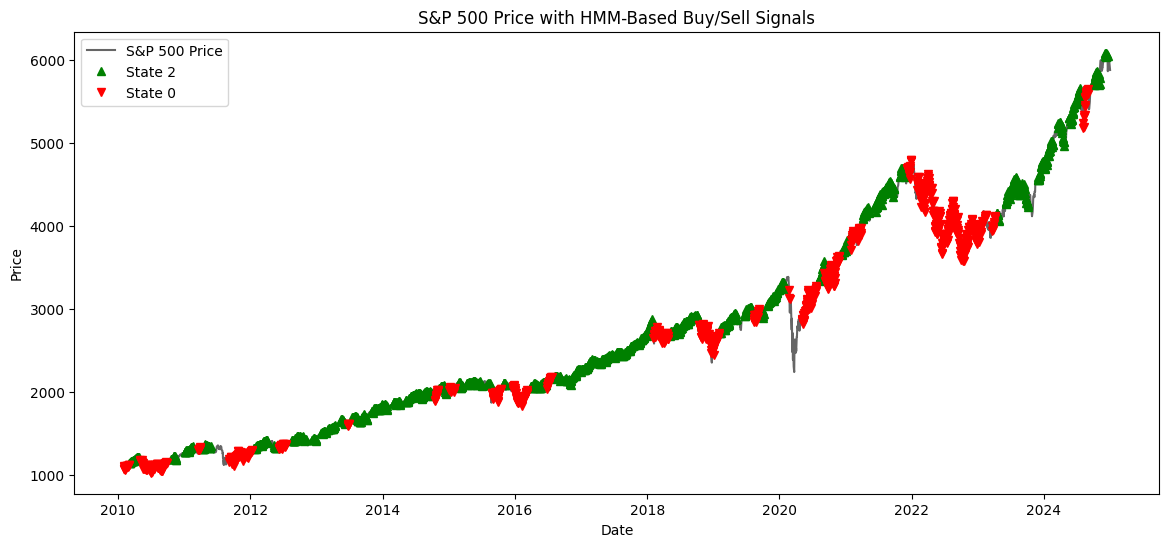

In [131]:
# Define trading actions based on states
sp500["Position"] = 0  # Default: Hold

sp500.loc[sp500["State"] == 0, "Position"] = -1  # sell in Bull Market
sp500.loc[sp500["State"] == 2, "Position"] = 1  # buy in Bear Market





plt.figure(figsize=(14, 6))
plt.plot(sp500.index, sp500["Close"], label="S&P 500 Price", color="black", alpha=0.6)


state = 2 # buy
plt.plot(sp500.index[sp500["State"] == state], sp500["Close"][sp500["State"] == state], ".", label=f"State {state}",marker="^",color='green')

state = 0 # sell
plt.plot(sp500.index[sp500["State"] == state], sp500["Close"][sp500["State"] == state], ".", label=f"State {state}",marker="v",color = 'red')


plt.legend()
plt.title("S&P 500 Price with HMM-Based Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
